**THIS Notebook does a simple linear regression on data from Libraries.io** 
The getting the data part is very much hacked together but it is placeholder data anyway,
The regression stuff should be quite solid.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




pd.set_option('display.max_columns', 500)

In [9]:
N_SAMPLES = 200000
VERBOSE = True
ALPHA = [0.1, 1]
P_CUTOFF = 0.01
PATH ="/home/rick/UH-Spring-2019/Project/codescoop-models/Libraries_io_data/repositories-1.2.0-2018-03-12.csv"

In [10]:
#Functions for factorizing and getting dummies
def gnumeric_func (data, columns):
    data[columns] = data[columns].apply(lambda x: pd.factorize(x)[0])
    return data

def getDummies (data, feature):
    dummies = pd.get_dummies(data[feature])
    data = pd.concat([data, dummies], axis=1)
    data = data.drop([feature],axis=1)
    return data

def runOLS(featureList, target, printoutput = True):

    dataxStats = datax[featureList]
    statsmodel = sm.OLS(target, dataxStats).fit()
    if printoutput:
        print(statsmodel.summary())
    return statsmodel

In [11]:
#getting the explanatory variables, and changing categorial values to dummies
data = pd.read_csv(PATH, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38], 
                   nrows = N_SAMPLES)


droplist = ['SourceRank','Description', 'Name with Owner', 'Created Timestamp', "Updated Timestamp", 'Last pushed Timestamp', 'Homepage URL', 'Mirror URL', 'UUID', 'Last Synced Timestamp','Fork Source Name with Owner', 'Changelog filename', 'Contributing guidelines filename', 'License filename','Code of Conduct filename', 'Security Threat Model filename', 'Security Audit filename', 'SCM type', 'Logo URL', 'Keywords', 'Stars Count' ]
factorizelist = ['Host Type', 'Fork', 'Issues enabled', 'Wiki enabled', 'Pages enabled', 'Default branch', 'Display Name', 'Pull requests enabled'] 
dummieslist = ['Language', 'License', 'Status']

datax = data.drop(droplist, axis=1)
datax = datax.drop(['Readme filename'], axis=1) #idk why I need to do it separately, cleaning is for later

datax = gnumeric_func(datax, factorizelist)

for item in dummieslist:
    datax = getDummies(datax,item)

datax.head()

/home/rick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,31,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Host Type,Fork,Size,Issues enabled,Wiki enabled,Pages enabled,Forks Count,Open Issues Count,Default branch,Watchers Count,Contributors Count,Display Name,Pull requests enabled,AGS Script,ANTLR,API Blueprint,ASP,ActionScript,ApacheConf,Apex,AppleScript,Arduino,Assembly,AutoIt,Batchfile,C,C#,C++,CMake,CSS,Ceylon,Cirru,Clean,Clojure,CoffeeScript,ColdFusion,Common Lisp,Coq,Cucumber,D,Dart,Dogescript,Eagle,Eiffel,Elixir,Emacs Lisp,Erlang,F#,FLUX,Fancy,Fortran,FreeMarker,GAP,GLSL,Game Maker Language,Genshi,Gherkin,Go,Gosu,Groff,Groovy,HCL,HTML,Hack,Handlebars,Haskell,Haxe,Hy,Isabelle,Java,JavaScript,Julia,Jupyter Notebook,KiCad,Kotlin,LLVM,Liquid,LiveScript,Lua,Makefile,Mathematica,Matlab,Max,Mirah,Nim,Nimrod,Nix,OCaml,Objective-C,Objective-C++,Objective-J,OpenEdge ABL,PHP,PLSQL,PLpgSQL,POV-Ray SDL,Pan,Pascal,Perl,Perl 6,PogoScript,PowerShell,Processing,Prolog,Protocol Buffer,Puppet,PureScript,Python,QML,R,RAML,Racket,Ragel,Roff,Ruby,Rust,SMT,SQLPL,Scala,Scheme,Shell,Smali,Smarty,SourcePawn,SuperCollider,Swift,Tcl,TeX,Thrift,TypeScript,Verilog,Vim script,VimL,Visual Basic,Web Ontology Language,XML,XProc,XSLT,Xtend,Yacc,Zephir,eC,nesC,wisp,AFL-3.0,AGPL-3.0,Apache-2.0,Artistic-2.0,BSD-2-Clause,BSD-3-Clause,BSD-3-Clause-Clear,BSL-1.0,CC-BY-4.0,CC-BY-NC-ND-3.0,CC-BY-SA-3.0,CC-BY-SA-4.0,CC0-1.0,ECL-2.0,EPL-1.0,EUPL-1.1,GPL-2.0,GPL-3.0,GPL-3.0+,ISC,LGPL-2.0,LGPL-2.1,LGPL-2.1+,LGPL-3.0,LGPL-3.0+,MIT,MPL-2.0,MS-PL,MS-RL,OFL-1.1,OSL-3.0,Other,Unlicense,W3C,WTFPL,Zlib,mit,Active,Deprecated,Help Wanted,Unmaintained
1,0,0,512,0,0,0,0,1,0,2,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,924,0,0,1,782,85,0,61,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,472,1,0,1,0,0,0,1,5,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,536,0,0,0,1,2,0,1,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,192,0,0,1,0,0,0,2,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
data.head()

,Host Type,Name with Owner,Description,Fork,Created Timestamp,Updated Timestamp,Last pushed Timestamp,Homepage URL,Size,Stars Count,Language,Issues enabled,Wiki enabled,Pages enabled,Forks Count,Mirror URL,Open Issues Count,Default branch,Watchers Count,UUID,Fork Source Name with Owner,License,Contributors Count,Readme filename,Changelog filename,Contributing guidelines filename,License filename,Code of Conduct filename,Security Threat Model filename,Security Audit filename,Status,Last Synced Timestamp,SourceRank,Display Name,SCM type,Pull requests enabled,Logo URL,Keywords
1,GitHub,brianmhunt/knockout-modal,Opinionated modals with Knockout.js,False,2014-09-15 01:21:34 UTC,2016-12-28 16:33:17 UTC,2016-12-18 18:31:32 UTC,http://brianmhunt.github.io/knockout-modal/,512,7,JavaScript,True,True,True,0,NaN,1,master,2,24038237,NaN,MIT,1,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2016-05-27 15:42:48 UTC,5,GitHub,NaN,NaN,NaN,NaN
2,GitHub,SteveSanderson/knockout.mapping,Object mapping plugin for KnockoutJS,False,2010-11-01 09:27:43 UTC,2018-02-11 10:04:55 UTC,2017-06-21 22:54:45 UTC,NaN,924,543,JavaScript,True,True,False,782,NaN,85,master,61,1041356,NaN,MIT,21,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2016-05-27 15:21:05 UTC,8,GitHub,NaN,git,NaN,NaN
3,GitHub,azman-co/knockout-model,A set of useful model and collection features ...,True,2014-09-13 03:14:07 UTC,2017-03-18 22:40:02 UTC,2015-01-14 02:01:03 UTC,NaN,472,1,JavaScript,False,True,False,0,NaN,0,master,1,23984550,devco/knockup,NaN,5,README.md,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-27 16:07:08 UTC,2,GitHub,NaN,NaN,NaN,NaN
4,GitHub,zonuexe/aozora-ruby-parser.js,Aozora-bunko ruby parser,False,2014-12-27 21:02:09 UTC,2016-12-28 16:45:20 UTC,2015-01-07 18:04:42 UTC,http://zonuexe.github.io/aozora-ruby-parser.js/,536,3,JavaScript,True,True,True,1,NaN,2,master,1,28546273,NaN,NaN,1,README.md,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-27 17:22:36 UTC,3,GitHub,NaN,NaN,NaN,NaN
5,GitHub,immense/knockout-pickatime,Pickadate timepicker binding for Knockout.js,False,2014-12-04 21:13:48 UTC,2017-03-18 22:40:04 UTC,2014-12-11 16:12:08 UTC,http://rawgit.com/immense/knockout-pickatime/m...,192,1,CoffeeScript,True,True,False,0,NaN,0,master,2,27560378,NaN,MIT,1,README.md,NaN,NaN,LICENSE,NaN,NaN,NaN,NaN,2016-05-27 18:52:59 UTC,4,GitHub,NaN,NaN,NaN,NaN


alpha =  0.1
Training score: 0.7703963121641022
Test score:  0.8028237023121765
Number of features used:  32
 
alpha =  1
Training score: 0.7700840703338367
Test score:  0.8027880727296737
Number of features used:  16
 
Optimal alpha =  0.1


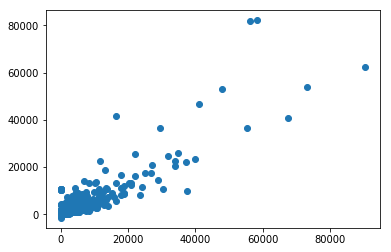

Mean squared error:  252130.53432813843
Model R² score:  0.8028237023121765


In [13]:
# This code demonstrates how to use lasso regression for choosing optimal variables
# for a linear model.

# x should be a dataframe containing the explanatory variables (forks, language, etc)
x = datax

# y should be a vector containing the target variable (number of stars)
y = list(data["Stars Count"])

# split the data in to train and test part
X_train, X_test, y_train, y_test = train_test_split(x, y)


## trying different alphas and choosing the optimal model

# if fitting of the model is really slow, you can drop last values of alpha to make it faster
alphas = ALPHA
n = len(alphas)
test_scores = np.zeros(n)

for i in range(0,n):
    a = alphas[i]
    lasso = Lasso(alpha = a, max_iter = 10e5)
    lasso.fit(X_train, y_train)
    train_score=lasso.score(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    test_scores[i] = test_score
    coeff_used = np.sum(lasso.coef_!=0)
    
    if VERBOSE:
        print("alpha = ", a)
        print("Training score:", train_score)
        print("Test score: ", test_score)
        print("Number of features used: ", coeff_used)
        print(" ")

# pick the alpha value with best score
best_alpha = alphas[np.argmax(test_scores)]
lasso = Lasso(alpha = best_alpha, max_iter = 10e5)
lasso.fit(X_train, y_train)

# create a dataframe with the coefficents of the features,
# then create a list of the features selected to use in OLS
df_coef = pd.DataFrame({'Features':x.columns,'coeff': lasso.coef_})
df_coef = df_coef.sort_values(by = ['coeff'])
df_coef = df_coef[df_coef.coeff != -0.0]
featureList = list(df_coef.Features)
    
# model summary
predicted = lasso.predict(X_test)
expected = y_test
# expected vs predicted values
if VERBOSE:
    print("Optimal alpha = ", best_alpha)
    plt.scatter(expected, predicted)
    plt.show()
    print("Mean squared error: ", mean_squared_error(expected, predicted))
    print("Model R² score: ", r2_score(expected, predicted))

In [20]:
test = runOLS(featureList=featureList, target=y, printoutput=False)
test.pvalues


Java                      2.404142e-56
Pages enabled             1.610549e-64
Issues enabled            1.720253e-44
Apache-2.0                1.012161e-02
Scala                     2.307412e-02
Haskell                   2.550527e-02
PHP                       3.669624e-09
Deprecated                4.621597e-02
ISC                       7.360687e-01
Rust                      9.570702e-01
Ruby                      5.221370e-09
Default branch            3.586543e-06
Size                     1.744167e-120
Emacs Lisp                2.108059e-04
Forks Count               0.000000e+00
GPL-3.0                   1.857989e-01
Open Issues Count         0.000000e+00
Contributors Count       5.023008e-108
Watchers Count            0.000000e+00
C++                       1.741333e-03
Unmaintained              2.294398e-01
BSD-2-Clause              4.437308e-03
Wiki enabled              1.421342e-09
JavaScript                4.413129e-59
MIT                       1.810589e-43
Pull requests enabled    

In [25]:
pvals = runOLS(featureList=featureList, target=y, printoutput=False).pvalues

keylist_second = list(dict(pvals[pvals < P_CUTOFF]).keys())


final_model = runOLS(keylist_second, y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 3.042e+04
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:48:17   Log-Likelihood:            -1.5081e+06
No. Observations:              200000   AIC:                         3.016e+06
Df Residuals:                  199976   BIC:                         3.017e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Java                    -96.06

In [26]:
# Save model to pickle

pickle.dump(final_model, open('pickle_model', 'wb'))
